# Universidad Nacional Abierta y a Distancia - UNAD

## Yesid Stiven Toloza Ruiz

## Predicción quién sobrevivió al naufragio del Titanic con Regresión Logística

In [30]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report



In [31]:
# Cargar el dataset
file_path = 'Titanic-Dataset.csv'
data = pd.read_csv(file_path)

In [36]:
# Mostrar las primeras filas para revisar los datos
data.head(), data.info(), data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(2), float64(2), int64(5)
memory usage: 50.6 KB


(   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
 0         0       3    0  22.0      1      0   7.2500       False        True
 1         1       1    1  38.0      1      0  71.2833       False       False
 2         1       3    1  26.0      0      0   7.9250       False        True
 3         1       1    1  35.0      1      0  53.1000       False        True
 4         0       3    0  35.0      0      0   8.0500       False        True,
 None,
           Survived      Pclass         Sex         Age       SibSp  \
 count   891.000000  891.000000  891.000000  891.000000  891.000000   
 unique         NaN         NaN         NaN         NaN         NaN   
 top            NaN         NaN         NaN         NaN         NaN   
 freq           NaN         NaN         NaN         NaN         NaN   
 mean      0.383838    2.308642    0.352413   29.361582    0.523008   
 std       0.486592    0.836071    0.477990   13.019697    1.102743   
 min       0.000000  

### Limpiar y preprocesar los datos

In [38]:
# Revisar las columnas disponibles en el dataset
print(data.columns)


Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [39]:
# Limpiar y preprocesar los datos (ajustado a las columnas actuales)

# Imputar valores faltantes
data['Age'] = data['Age'].fillna(data['Age'].median())

# Verificar si faltan datos en 'Embarked_Q' o 'Embarked_S'
if 'Embarked_Q' not in data.columns:
    data['Embarked_Q'] = 0  # Agregar columna si no existe
if 'Embarked_S' not in data.columns:
    data['Embarked_S'] = 0  # Agregar columna si no existe

# Revisar los datos procesados
data.info(), data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_Q  891 non-null    bool   
 8   Embarked_S  891 non-null    bool   
dtypes: bool(2), float64(2), int64(5)
memory usage: 50.6 KB


(None,
    Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
 0         0       3    0  22.0      1      0   7.2500       False        True
 1         1       1    1  38.0      1      0  71.2833       False       False
 2         1       3    1  26.0      0      0   7.9250       False        True
 3         1       1    1  35.0      1      0  53.1000       False        True
 4         0       3    0  35.0      0      0   8.0500       False        True)

In [40]:
# Dividir en variables predictoras (X) y objetivo (y)
X = data.drop('Survived', axis=1)
y = data['Survived']

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Mostrar la distribución de las clases en el conjunto de entrenamiento
y_train.value_counts(normalize=True)


Survived
0    0.616573
1    0.383427
Name: proportion, dtype: float64

In [45]:
# 1. Análisis exploratorio
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

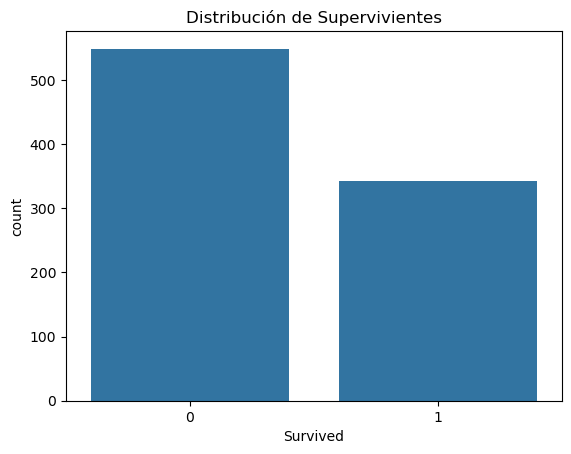

In [46]:
# Ver distribuciones de las variables principales
sns.countplot(x='Survived', data=data)
plt.title('Distribución de Supervivientes')
plt.show()

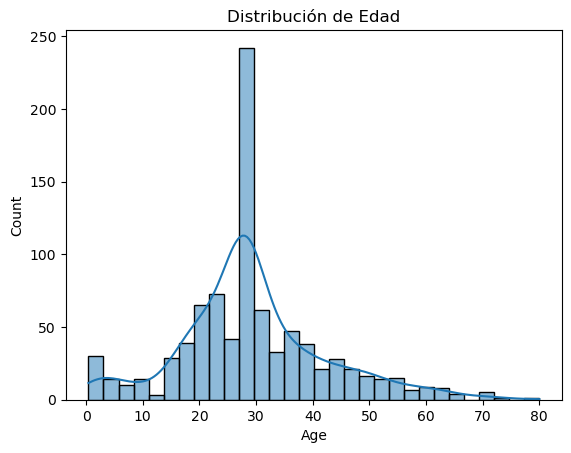

In [47]:
sns.histplot(data['Age'], kde=True)
plt.title('Distribución de Edad')
plt.show()

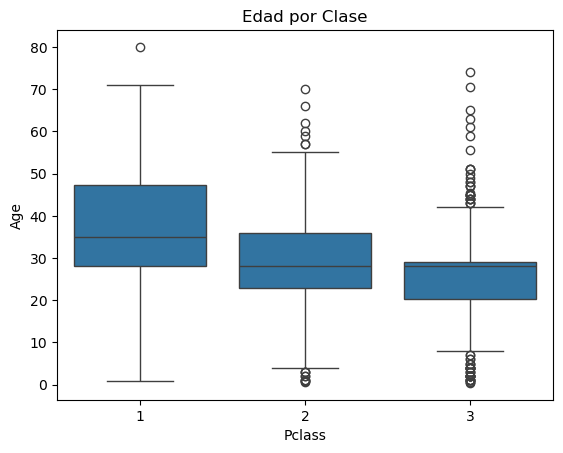

In [48]:
sns.boxplot(x='Pclass', y='Age', data=data)
plt.title('Edad por Clase')
plt.show()

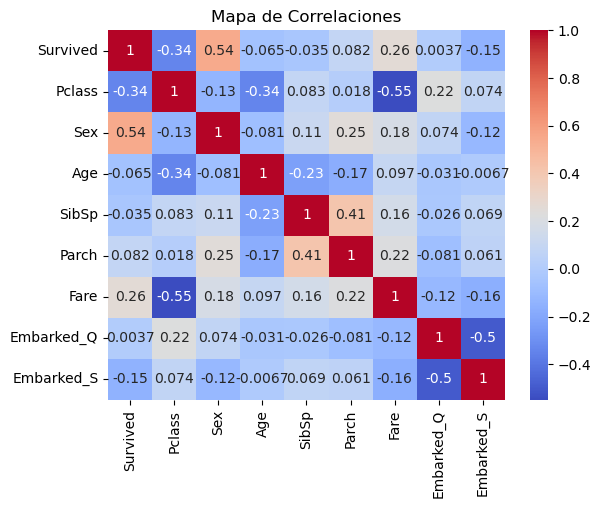

In [49]:
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title('Mapa de Correlaciones')
plt.show()

In [50]:
# 3. Selección de características
X = data.drop('Survived', axis=1)  # Variables independientes
y = data['Survived']  # Variable dependiente

# Selección basada en correlación (ejemplo)
correlations = data.corr()
print(correlations['Survived'].sort_values(ascending=False))

# Variables seleccionadas manualmente
X = X[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']]

Survived      1.000000
Sex           0.543351
Fare          0.257307
Parch         0.081629
Embarked_Q    0.003650
SibSp        -0.035322
Age          -0.064910
Embarked_S   -0.149683
Pclass       -0.338481
Name: Survived, dtype: float64


In [51]:
# 4. División del dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# 5. Entrenamiento del modelo
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



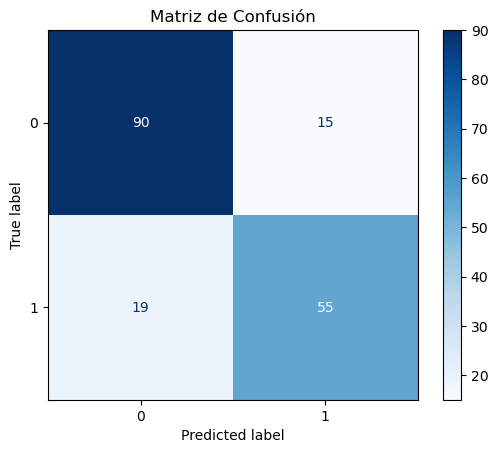

In [53]:
# 6. Evaluación del modelo
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("Informe de clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot(cmap="Blues")
plt.title('Matriz de Confusión')
plt.show()


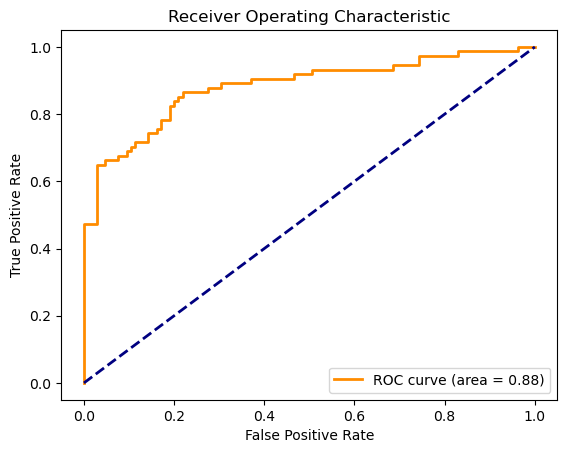

In [54]:
# 7. Gráficas
# Curva ROC
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### 8. Interpretación y análisis

1. Correlación de variables
   
    La tabla de correlaciones muestra la relación entre las variables predictoras y la variable objetivo (Survived):
    
    - Sex (0.543): El género tiene la mayor correlación positiva con la supervivencia. Esto sugiere que el género femenino tenía más probabilidad de sobrevivir, coherente con la política de evacuación "mujeres y niños primero".
    
    - Fare (0.257): Existe una correlación positiva, indicando que los pasajeros con boletos más costosos tenían mayores probabilidades de sobrevivir.
    
    - Pclass (-0.338): Tiene una correlación negativa significativa, reflejando que los pasajeros de clases más bajas tenían menos posibilidades de sobrevivir.
    
    - Otras variables, como Age, Parch y SibSp, tienen correlaciones más débiles, lo que indica menor impacto en la supervivencia.

2. Modelo de Regresión Logística
   
    El modelo de regresión logística se ajustó utilizando un número de iteraciones aumentado (max_iter=1000) para asegurar la convergencia.

3. Evaluación del modelo
   
    A partir del informe de clasificación:
    
    - Precisión global: 81%. El modelo clasifica correctamente al 81% de los pasajeros.
    
    - Desempeño por clase:

        - Para los que no sobrevivieron (clase 0): Precisión de 83%, recall de 86%, F1-score de 84%. Esto indica que el modelo predice eficazmente a los pasajeros que no sobrevivieron.
        
        - Para los que sobrevivieron (clase 1): Precisión de 79%, recall de 74%, F1-score de 76%. Aunque el desempeño es ligeramente menor, sigue siendo razonable.

4. Análisis de métricas
   
- Recall: Es mejor para la clase 0 (no sobrevivientes), lo que significa que el modelo identifica bien a quienes no sobrevivieron, pero puede fallar en reconocer todos los sobrevivientes.

- F1-score: Indica un balance adecuado entre precisión y recall para ambas clases.

- Macro promedio (80%): Representa un desempeño balanceado en ambas clases, aunque ligeramente inferior al promedio ponderado.

5. Observaciones
   
    - La precisión más baja para los sobrevivientes podría deberse a desequilibrios en los datos (mayor cantidad de no sobrevivientes).
    - Variables como Embarked_Q y Embarked_S tienen una correlación débil, lo que sugiere que su impacto es limitado. Podrían ser candidatas a eliminar en futuras optimizaciones.

6. Documentación
   
    El modelo logra un desempeño sólido considerando las características disponibles. Sin embargo, podrían realizarse las siguientes mejoras:

    - Recolección de más datos: Para reducir posibles sesgos y mejorar el recall de la clase sobreviviente.
    - Balanceo de datos: Usar técnicas como sobremuestreo (SMOTE) o submuestreo para equilibrar las clases.
    - Hiperparámetros adicionales: Ajustar parámetros como C (regularización) o probar con class_weight='balanced' para mejorar el manejo del desequilibrio.